In [1]:
library(survival)
library(MASS)
library(openxlsx)
library(corrplot)
library(rworldmap)
library(RColorBrewer)
library(ggplot2)

Warning message:
“package ‘survival’ was built under R version 3.6.2”
corrplot 0.84 loaded

Loading required package: sp

### Welcome to rworldmap ###

For a short introduction type : 	 vignette('rworldmap')



In [2]:
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [3]:
# 警告メッセージ非表示
options(warn=-1)

In [4]:
df <- read.xlsx("../../data/data_covid_fix_name.xlsx")
df <- na.omit(df)
head(df)

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2866376,60.319,13364.155,6996524,7.84,8.005411,7.67,70,74.3,1,108641,303.14
2,Algeria,42228429,72.629,15481.788,9108277,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
3,Angola,30809762,65.514,6452.355,10490120,5.40,5.979936,4.83,83,17.9,1,303691,76.94
4,Argentina,44494502,91.870,20610.569,19025624,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
6,Australia,24992369,86.012,51663.365,7608913,8.62,9.160533,8.07,26,97.3,1,1347,75667.65
7,Austria,8847037,58.297,55454.689,7103537,8.48,9.245685,7.71,58,73.2,1,80272,12935.50


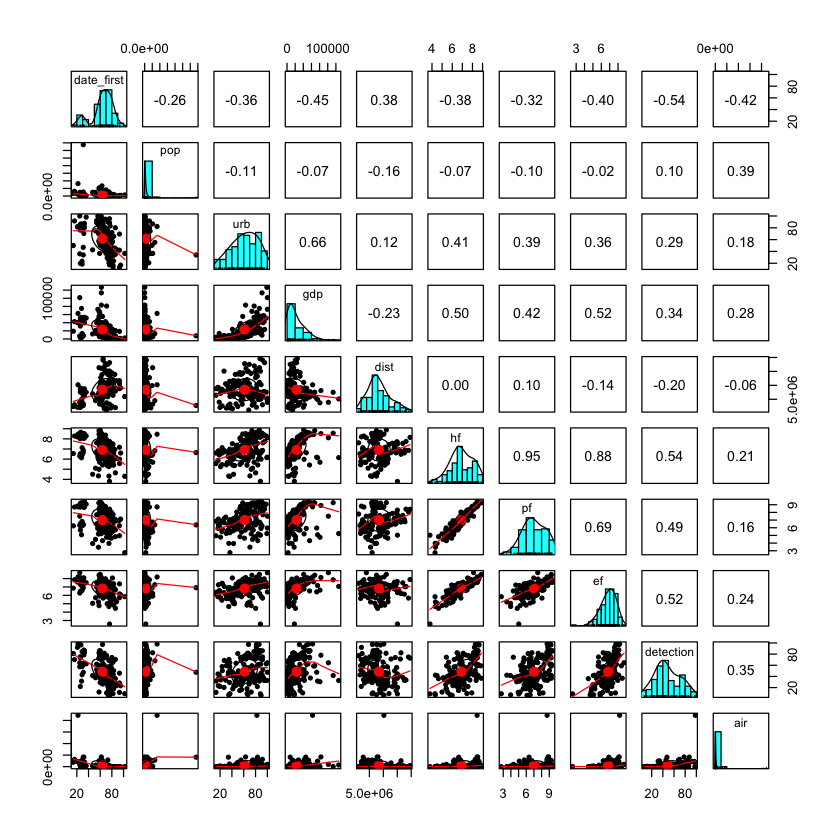

In [5]:
pairs.panels(df[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])

In [6]:
# データを感染の大小で分ける
early_country <- df[df$date_first < 40, ]
late_country <- df[df$date_first > 40, ]

Saving 7 x 7 in image



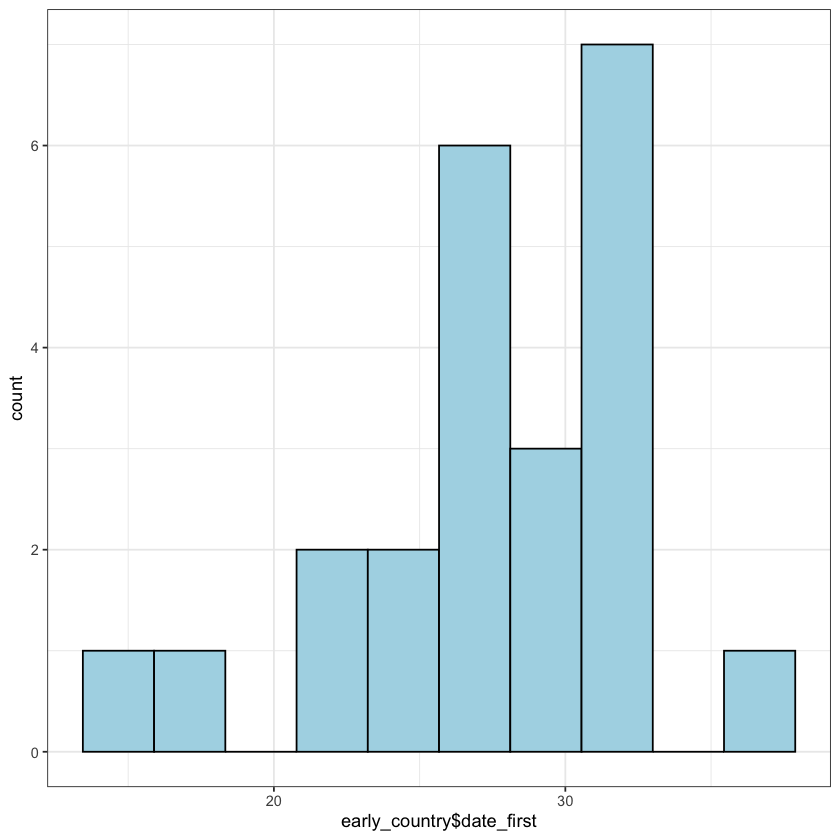

In [7]:
g <- ggplot(early_country, aes(x = early_country$date_first))
g <- g + geom_histogram(color="black",fill="light blue", bins = 10) + theme_bw()
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/y_early_hist.eps")

In [8]:
# 正規化なし
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/y_early_matrix.eps")

pairs.panels(early_country[c( 'pop', 'urb', 'gdp', 'dist', 'hf','date_first', 'detection', 'air')])

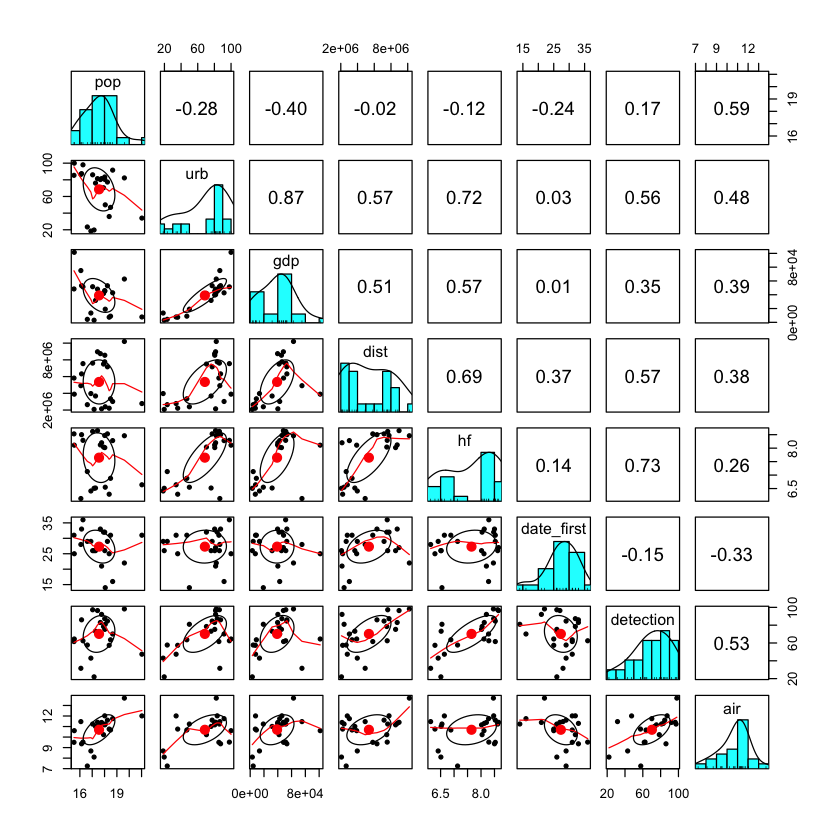

In [9]:
# 正規化あり
tmp <- early_country
tmp$air <- log(tmp$air )
tmp$pop <- log(tmp$pop )
pairs.panels(tmp[c( 'pop', 'urb', 'gdp', 'dist', 'hf','date_first', 'detection', 'air')])

#### 晩期の可視化

Saving 7 x 7 in image



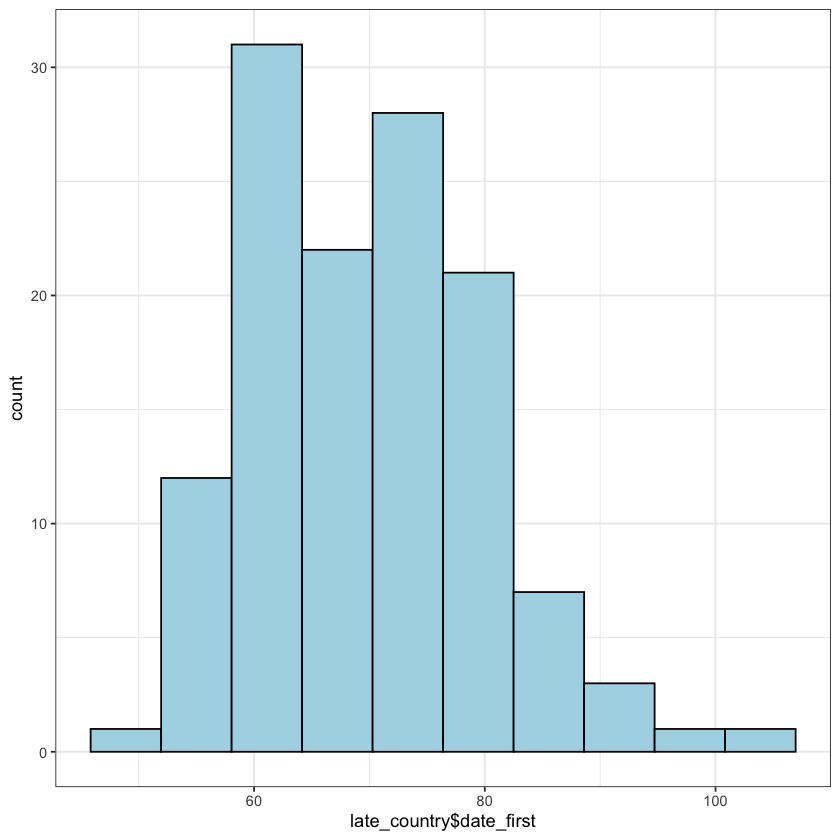

In [10]:
g <- ggplot(late_country, aes(x = late_country$date_first))
g <- g + geom_histogram(color="black",fill="light blue", bins = 10) + theme_bw()
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/y_late_hist.eps")

In [11]:
# 正規化なし
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/y_late_matrix.eps")
pairs.panels(late_country[c( 'pop', 'urb', 'gdp', 'dist', 'hf','date_first', 'detection', 'air')])

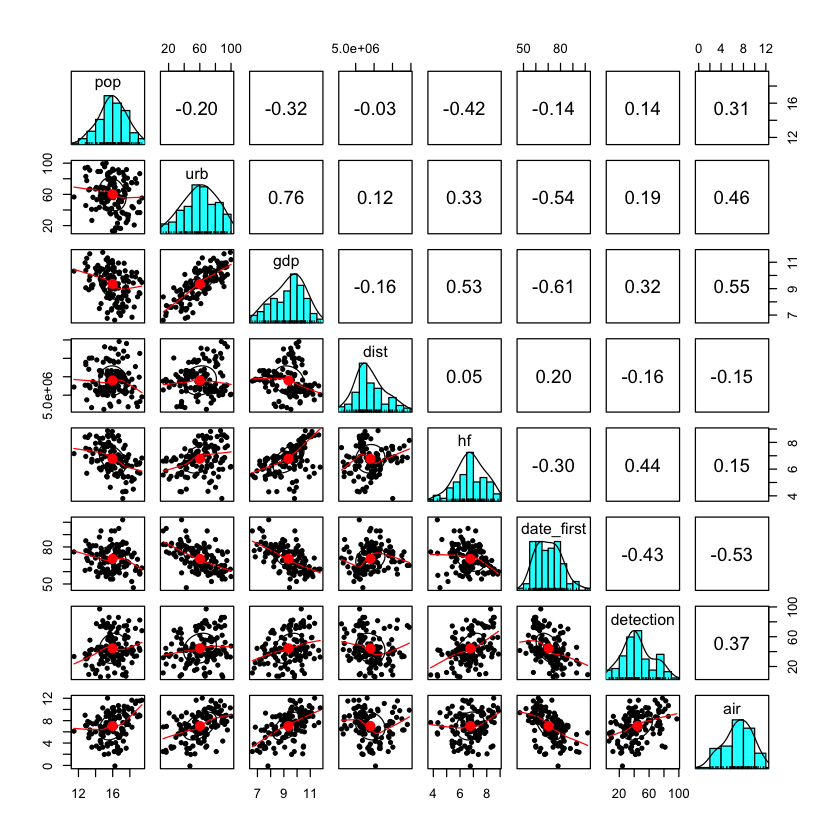

In [12]:
# 正規化あり
tmp <- late_country
tmp$air <- log(tmp$air )
tmp$pop <- log(tmp$pop )
tmp$gdp <- log(tmp$gdp )
pairs.panels(tmp[c( 'pop', 'urb', 'gdp', 'dist', 'hf','date_first', 'detection', 'air')])

# 解析

In [13]:
tmp <- early_country[c(2,3,4,5,6,7,8,9,10,11,12,13)]
tmp <- data.frame( scale(tmp))
tmp$date_first <- early_country$date_first
model_early <- lm(formula = date_first ~ hf + pop + gdp+ urb + dist + air + detection , data =tmp )
summary(model_early)


Call:
lm(formula = date_first ~ hf + pop + gdp + urb + dist + air + 
    detection, data = tmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9721 -1.3417  0.7206  2.4184  5.3049 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  27.3043     0.8715  31.329 4.38e-15 ***
hf            0.9173     1.7117   0.536  0.59988    
pop           1.3293     1.0314   1.289  0.21699    
gdp          -0.6436     2.0559  -0.313  0.75855    
urb          -0.3587     2.3113  -0.155  0.87873    
dist          4.7264     1.3495   3.502  0.00321 ** 
air          -2.8355     1.1789  -2.405  0.02952 *  
detection    -2.5620     1.5156  -1.690  0.11162    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.18 on 15 degrees of freedom
Multiple R-squared:  0.5806,	Adjusted R-squared:  0.3849 
F-statistic: 2.967 on 7 and 15 DF,  p-value: 0.03654


In [14]:
AIC(model_early)

[1] 139.2312

In [15]:
y_hat_early <- predict(model_early)
y_hat_early

6       14       26       28       49       50       54       65 
28.32376 32.95684 26.09132 30.89268 30.44452 32.66858 28.83854 30.68942 
      71       73       88      101      115      127      131      132 
31.27941 22.97209 23.10741 28.99838 25.69506 24.19242 19.05576 32.04332 
     133      136      138      146      147      149      152 
29.35955 28.18614 20.49643 28.13933 28.65325 20.98032 23.93546

pdf 
  2

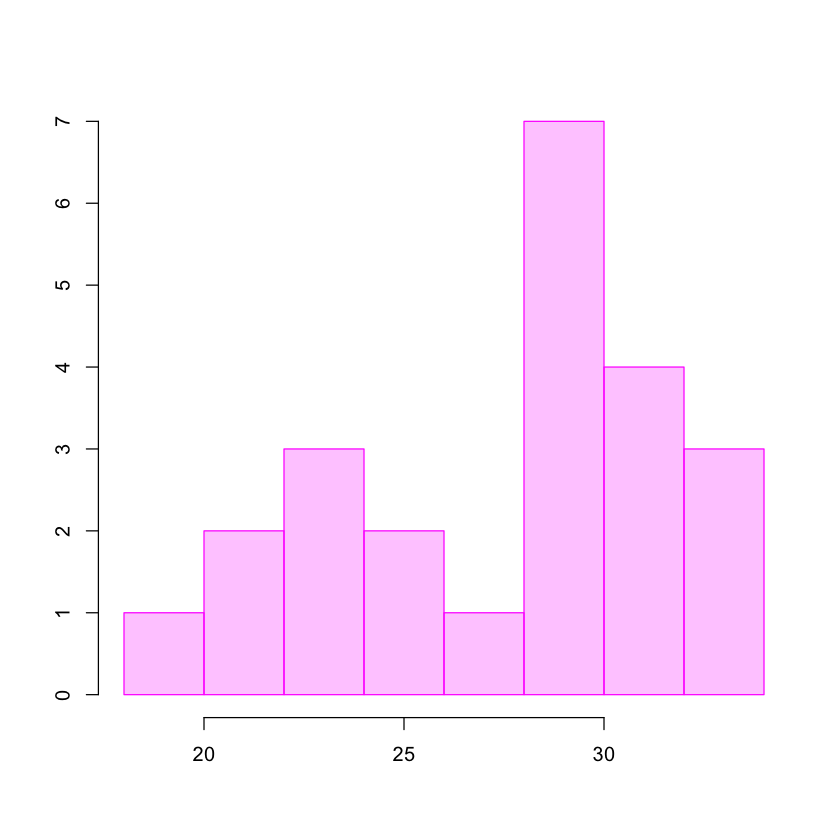

In [16]:
pdf("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/y_early_hat_hist.pdf") 
hist(y_hat_early, col = "#ff00ff40", border = "#ff00ff", main="", xlab="", ylab="")
dev.off()

hist(y_hat_early, col = "#ff00ff40", border = "#ff00ff", main="", xlab="", ylab="")

pdf 
  2

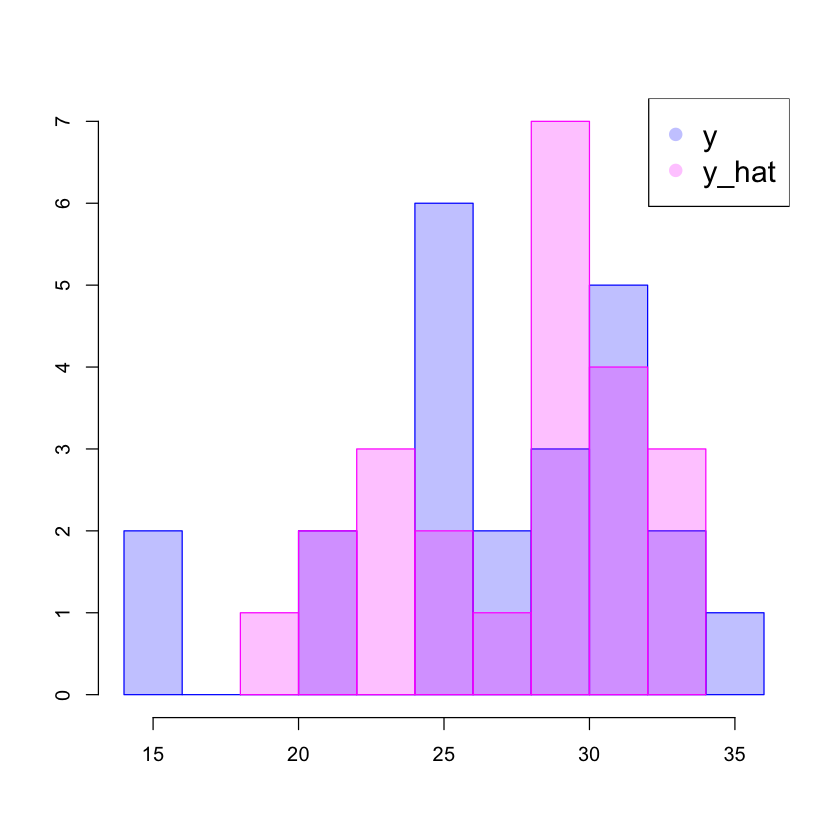

In [17]:
pdf("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/y_early_y_early_hat_hist.pdf") 

hist(early_country$date_first, col = "#0000ff40", border = "#0000ff", main="", xlab="", ylab="", breaks=10, ylim=c(0,7))
hist(y_hat_early, col = "#ff00ff40", border = "#ff00ff", add = TRUE, main="", xlab="", ylab="", ylim=c(0,7))
legend("topright", legend=c("y", "y_hat"), col=c("#0000ff40", "#ff00ff40"), pch=16, cex=1.5)
dev.off()

hist(early_country$date_first, col = "#0000ff40", border = "#0000ff", main="", xlab="", ylab="", breaks=10, ylim=c(0,7))
hist(y_hat_early, col = "#ff00ff40", border = "#ff00ff", add = TRUE, main="", xlab="", ylab="", ylim=c(0,7))
legend("topright", legend=c("y", "y_hat"), col=c("#0000ff40", "#ff00ff40"), pch=16, cex=1.5)

Saving 7 x 7 in image



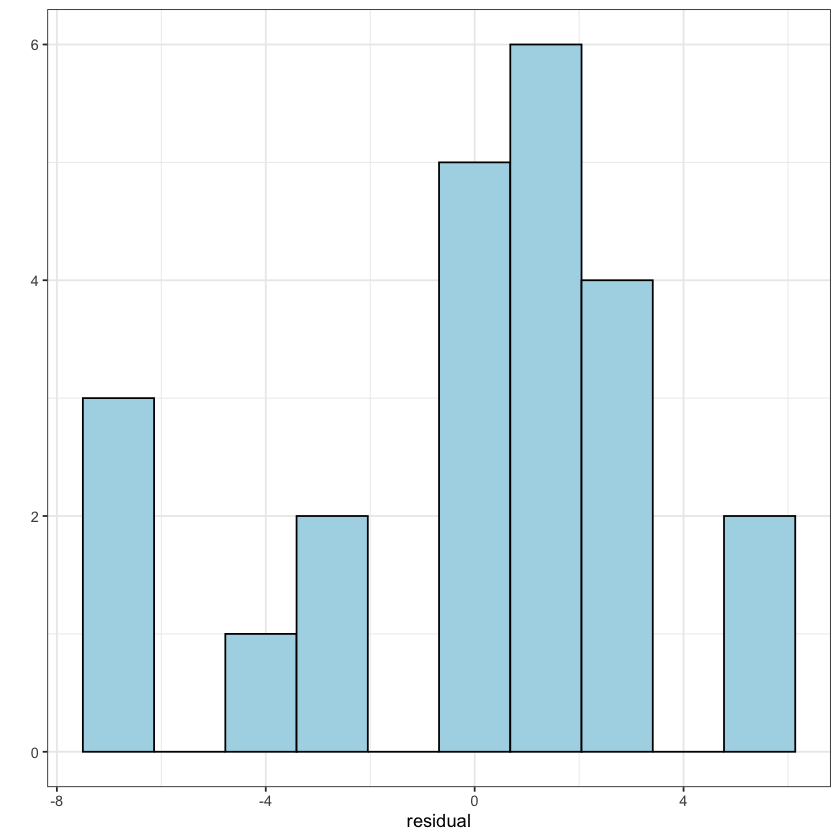

In [18]:
early_country$resid <-(early_country$date_first - y_hat_early)

g <- ggplot(early_country, aes(x = early_country$resid))
g <- g + geom_histogram(color="black",fill="light blue", bins = 10) + theme_bw()+ xlab("residual")+ ylab("")
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/resid_ealry.eps")

Saving 7 x 7 in image



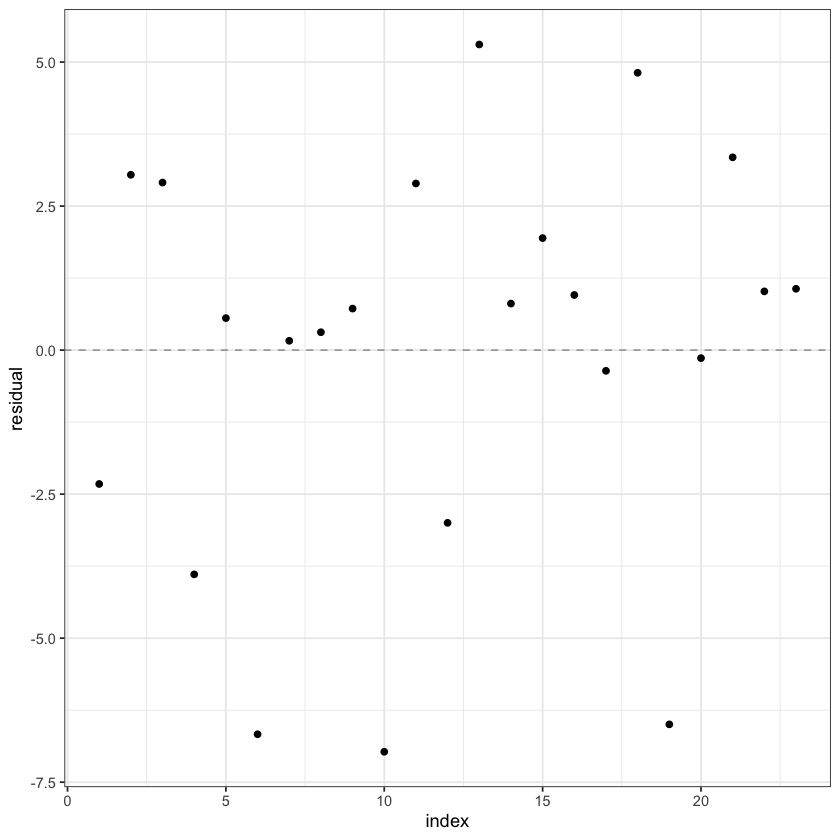

In [19]:
X = 1:nrow(early_country)
g<-ggplot(early_country, aes(x=X, y=early_country$resid)) + geom_point()　+ xlab("index")+ ylab("residual")
g <- g + theme_bw() + geom_hline(yintercept = 0, linetype=2,color="darkgrey") 
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/scatter_resid_early.eps")

# 晩期感染国

In [20]:
tmp <- late_country[c(2,3,4,5,6,7,8,9,10,11,12,13)]
tmp <- data.frame( scale(tmp))
tmp$date_first <- late_country$date_first
model_late <- lm(formula = date_first ~ hf + pop + gdp+ urb + dist + air + detection , data =tmp )
summary(model_late)


Call:
lm(formula = date_first ~ hf + pop + gdp + urb + dist + air + 
    detection, data = tmp)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.0362  -4.5560   0.0196   4.7740  21.1176 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  70.3228     0.6411 109.695  < 2e-16 ***
hf           -0.9777     0.8461  -1.156 0.250194    
pop          -3.3883     0.8617  -3.932 0.000142 ***
gdp          -1.7271     1.0043  -1.720 0.088090 .  
urb          -4.4875     0.8711  -5.151 1.04e-06 ***
dist          1.5818     0.7403   2.137 0.034672 *  
air           1.3744     0.8556   1.606 0.110861    
detection    -2.3498     0.7769  -3.025 0.003050 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.225 on 119 degrees of freedom
Multiple R-squared:  0.5147,	Adjusted R-squared:  0.4861 
F-statistic: 18.03 on 7 and 119 DF,  p-value: 3.64e-16


In [21]:
AIC(model_late)

[1] 872.4289

In [22]:
y_hat_late <- predict(model_late)
y_hat_late

1        2        3        4        7        8        9       10 
66.79046 72.10056 74.31192 62.08588 63.76077 71.02774 69.56886 62.03470 
      11       13       15       16       17       18       19       20 
63.68290 67.96403 79.17843 77.91460 74.05663 74.96589 73.44150 71.88245 
      21       22       23       24       25       27       29       30 
55.27399 63.78799 65.01530 80.21938 87.34612 74.32005 76.17417 81.25639 
      31       32       33       34       35       36       37       38 
81.88098 64.84329 68.67624 76.66963 67.68365 74.20199 66.64734 70.59928 
      39       40       41       42       43       44       45       46 
64.50040 74.06439 55.68255 69.28716 70.31440 71.03617 68.36435 61.93448 
      47       48       51       52       53       55       56       57 
75.98175 76.08208 71.18788 75.37009 66.47021 72.65422 61.69784 74.40261 
      58       59       60       62       63       64       66       67 
77.87750 80.76092 84.99254 76.85778 66.50531 60.87139 55.20658 64.38869 
      68       69       70       72       74       75       76       77 
68.06728 69.17952 60.26483 77.24632 64.40678 70.22024 73.28000 57.83374 
      78       79       80       81       82       83       84       85 
72.55536 72.35957 60.61331 62.69638 77.98038 69.49091 61.87121 56.01628 
      86       87       90       91       92       93       94       95 
76.69883 83.74214 62.09596 76.50095 74.71962 60.18354 75.16729 62.55211 
      96       97       98       99      100      102      103      104 
67.57551 69.35405 78.56254 71.95418 75.15007 56.32968 64.85560 75.36988 
     105      106      107      108      109      110      111      112 
81.82375 61.53610 71.29124 59.46701 64.54341 61.53776 71.63160 83.00800 
     113      114      116      117      118      119      120      121 
75.96924 70.17210 64.66803 67.77937 56.84514 69.17961 62.01183 82.26259 
     122      123      124      125      126      128      129      130 
60.05322 76.84689 70.85392 71.89031 78.09903 69.39273 66.19543 64.10708 
     134      135      137      140      141      142      143      144 
81.30442 73.46411 61.87020 77.33335 78.13796 72.25167 67.32572 76.92001 
     145      148      150      151      153      154      155 
67.88415 75.17109 67.75937 73.16818 81.20108 78.39008 76.90475

pdf 
  2

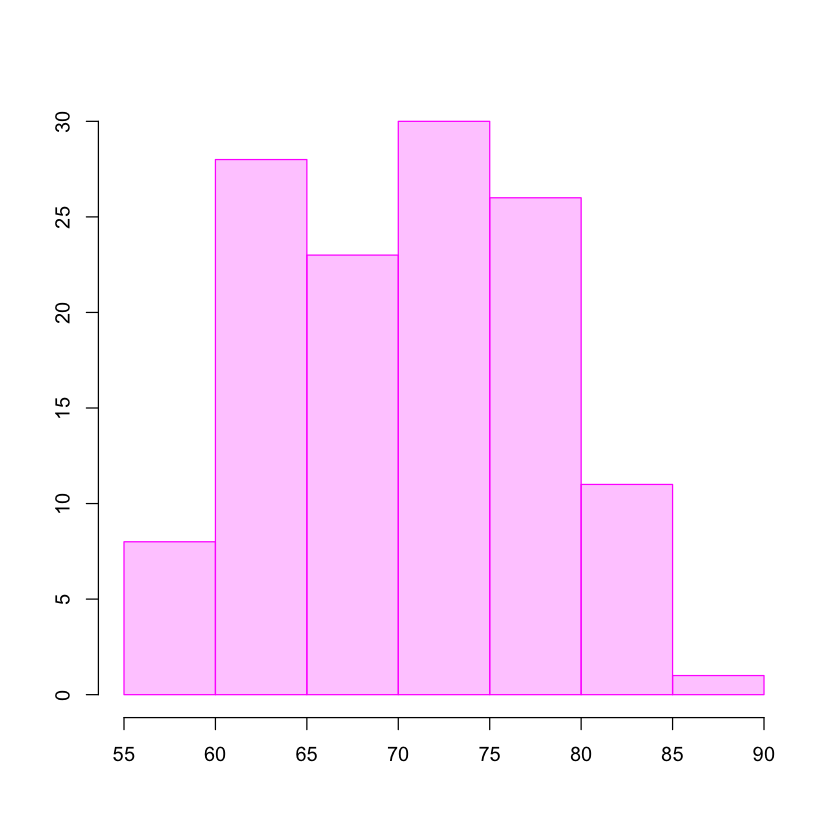

In [23]:
pdf("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/y_late_hat_hist.pdf") 
hist(y_hat_late, col = "#ff00ff40", border = "#ff00ff", main="", xlab="", ylab="", breaks=10)
dev.off()

hist(y_hat_late, col = "#ff00ff40", border = "#ff00ff", main="", xlab="", ylab="", breaks=10)

pdf 
  2

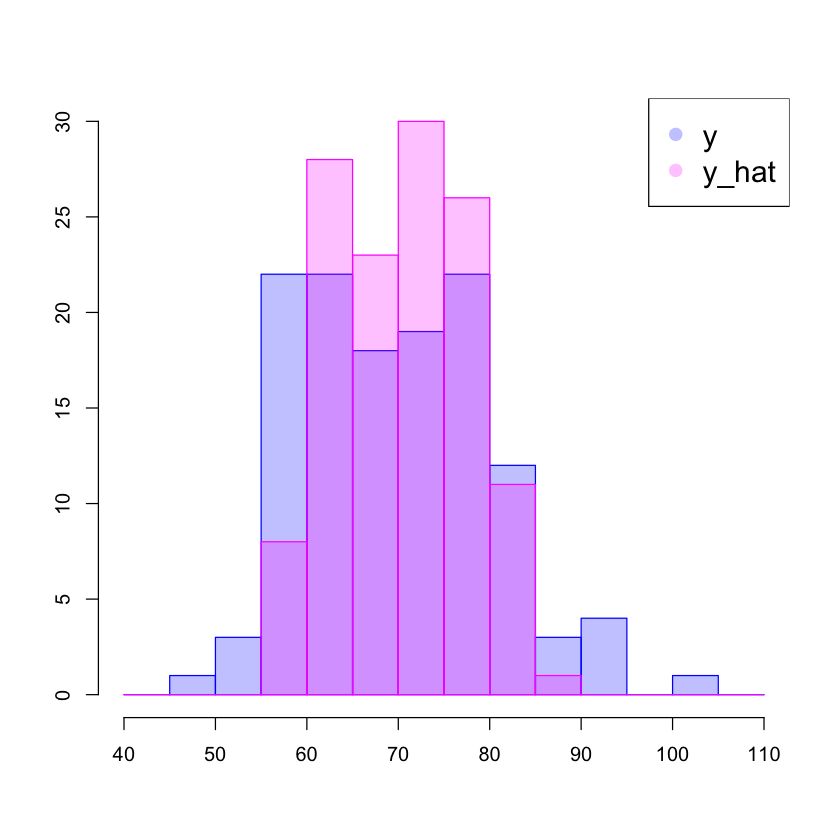

In [24]:
pdf("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/y_late_y_late_hat_hist.pdf") 

hist(late_country$date_first, col = "#0000ff40", border = "#0000ff", main="", xlab="", ylab="", breaks=seq(40,110,5), ylim=c(0,30))
hist(y_hat_late, col = "#ff00ff40", border = "#ff00ff", add = TRUE, main="", xlab="", ylab="", breaks=seq(40,110,5), ylim=c(0,30))
legend("topright", legend=c("y", "y_hat"), col=c("#0000ff40", "#ff00ff40"), pch=16, cex=1.5)
dev.off()

hist(late_country$date_first, col = "#0000ff40", border = "#0000ff", main="", xlab="", ylab="", breaks=seq(40,110, 5), ylim=c(0,30))
hist(y_hat_late, col = "#ff00ff40", border = "#ff00ff", add = TRUE, main="", xlab="", ylab="", breaks=seq(40,110,5), ylim=c(0,30))
legend("topright", legend=c("y", "y_hat"), col=c("#0000ff40", "#ff00ff40"), pch=16, cex=1.5)

Saving 7 x 7 in image



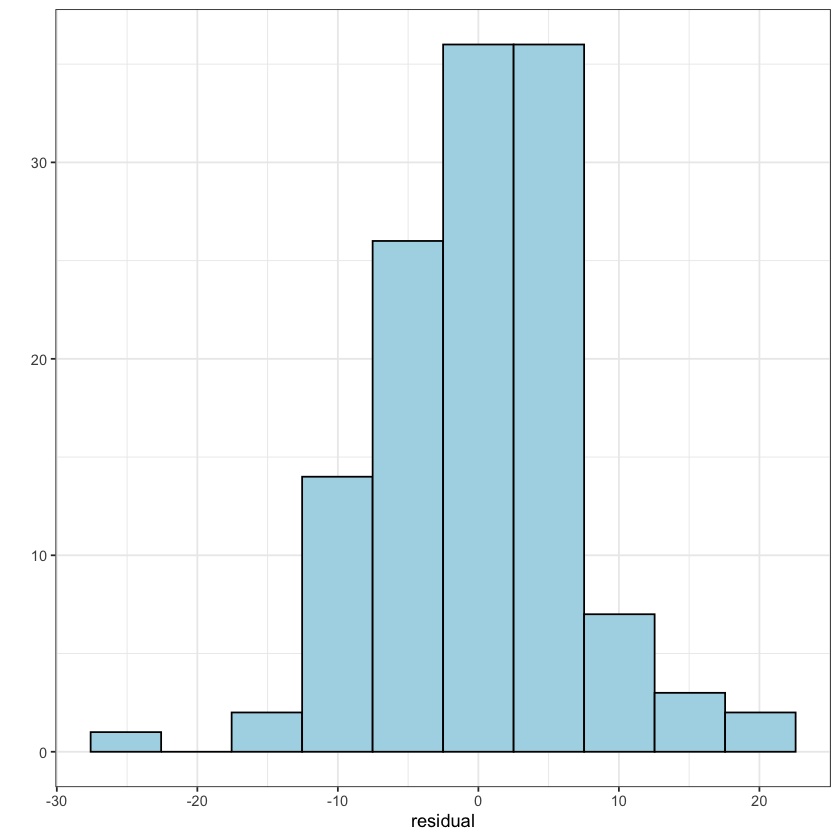

In [25]:
late_country$resid <-(late_country$date_first - y_hat_late)

g <- ggplot(late_country, aes(x = late_country$resid))
g <- g + geom_histogram(color="black",fill="light blue", bins = 10) + theme_bw()+ xlab("residual")+ ylab("")
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/resid_late.eps")

Saving 7 x 7 in image



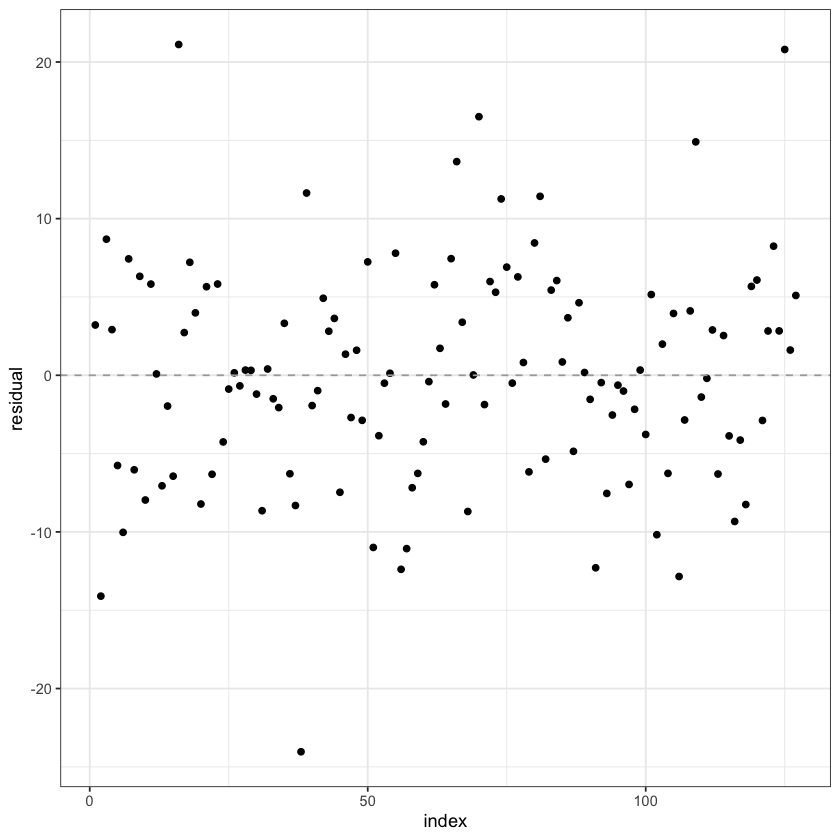

In [26]:
X = 1:nrow(late_country)
g<-ggplot(late_country, aes(x=X, y=late_country$resid)) + geom_point()　+ xlab("index")+ ylab("residual")
g <- g + theme_bw() + geom_hline(yintercept = 0, linetype=2,color="darkgrey") 
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/scatter_resid_late.eps")